# [Lab Session 3](fourier.ipynb)


In [381]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


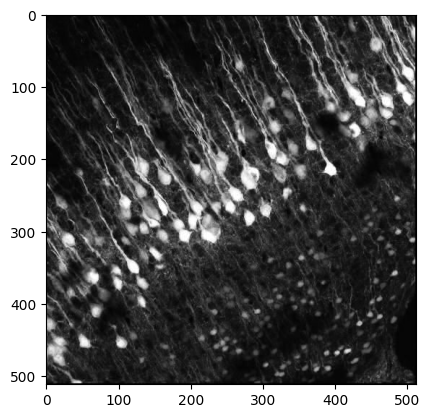

In [382]:
cell_img = plt.imread('data/cells.png')
plt.imshow(cell_img, cmap='gray')

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [383]:
cell_ft = np.fft.fft2(cell_img)

cell_ft.dtype


dtype('complex128')

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [384]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)



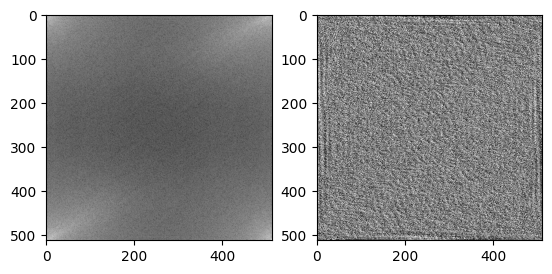

In [385]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


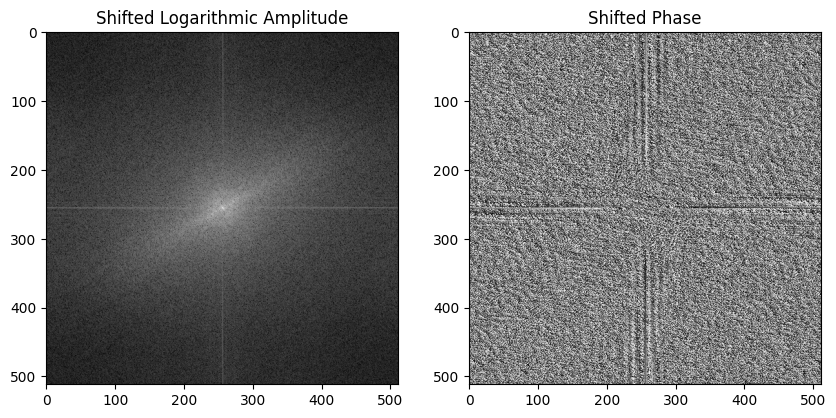

In [386]:
shifted_cell_ft = np.fft.fftshift(cell_ft)

shifted_cell_amplitude = np.abs(shifted_cell_ft)
shifted_cell_phase = np.angle(shifted_cell_ft)

# Anzeigen der verschobenen Amplitude und Phase
plt.figure(figsize=(10, 5))

# Amplitude anzeigen (logarithmisch)
plt.subplot(1, 2, 1)
plt.imshow(np.log(shifted_amplitude + 1), cmap='gray')
plt.title("Shifted Logarithmic Amplitude")

# Phase anzeigen
plt.subplot(1, 2, 2)
plt.imshow(shifted_phase, cmap='gray')
plt.title("Shifted Phase")
plt.show()



**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


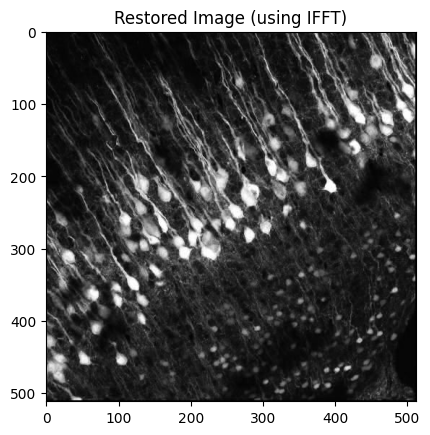

In [387]:
restored_cell_ft = np.fft.ifftshift(shifted_cell_ft)  # Zurückverschiebung des Spektrums
restored_image = np.fft.ifft2(restored_cell_ft)  # Anwenden der Inversen FFT

# Nur den realen Teil der IFFT verwenden, da das Originalbild reale Werte enthält
restored_image_real = np.real(restored_image)

# Anzeigen des wiederhergestellten Bildes
plt.imshow(restored_image_real, cmap='gray')
plt.title("Restored Image (using IFFT)")
plt.show()

---


**[Task 2 (a).]()** Load the brain MR image.


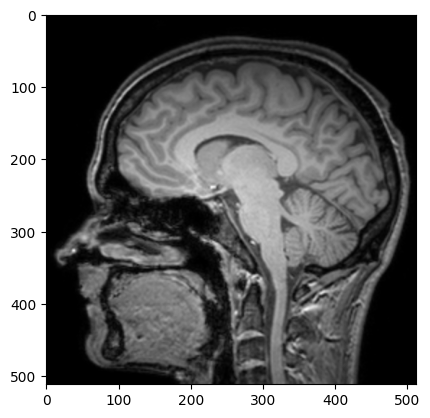

In [388]:
brain_mri = plt.imread('data/brain_mri.png')
if brain_mri.shape != cell_img.shape:
    brain_mri = resize(brain_mri, cell_img.shape)

plt.imshow(brain_mri, cmap='gray')

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


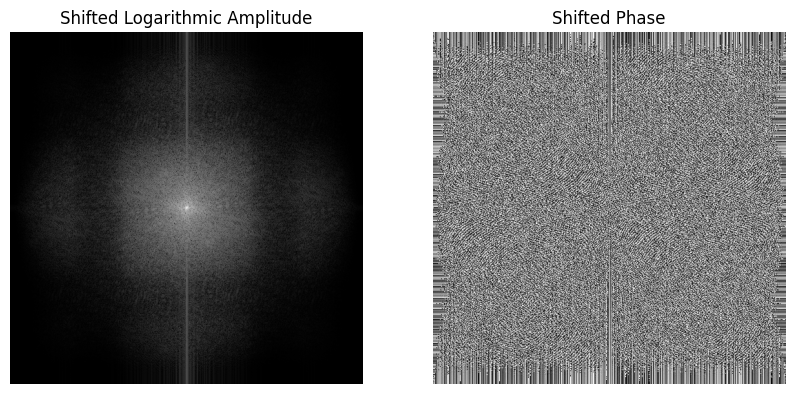

In [389]:
brain_ft = np.fft.fft2(brain_mri)
shifted_brain_ft = np.fft.fftshift(brain_ft)
shifted_brain_amplitude = np.abs(shifted_brain_ft)
shifted_brain_phase = np.angle(shifted_brain_ft)

plt.figure(figsize=(10, 5))

# Amplitude anzeigen (logarithmisch)
plt.subplot(1, 2, 1)
plt.imshow(np.log(shifted_brain_amplitude + 1), cmap='gray')
plt.title("Shifted Logarithmic Amplitude")
plt.axis('off')

# Phase anzeigen
plt.subplot(1, 2, 2)
plt.imshow(shifted_brain_phase, cmap='gray')
plt.title("Shifted Phase")
plt.axis('off')

plt.show()



In [390]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)




**[Task 2 (c).]()** Merge the amplitude of the brain MR image and the phase of cell image. Do the IFFT and display the resulting image.


In [391]:
if brain_mri.shape != cell_img.shape:
    brain_mri = resize(brain_mri, cell_img.shape, mode='reflect', anti_aliasing=True)

merged_ft_brain_amplitude_cell_phase = to_complex_array(shifted_brain_amplitude, shifted_cell_phase)
merged_ft_brain_phase_cell_phase = to_complex_array(shifted_cell_amplitude, shifted_brain_phase)


**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


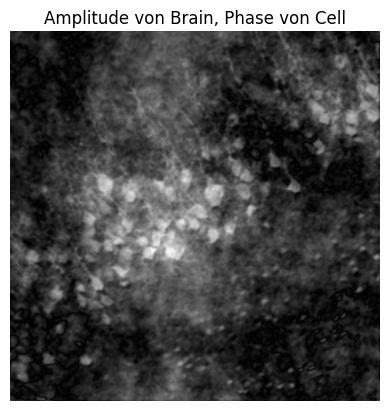

Text(0.5, 1.0, 'Phase von Brain, Phase von Cell')

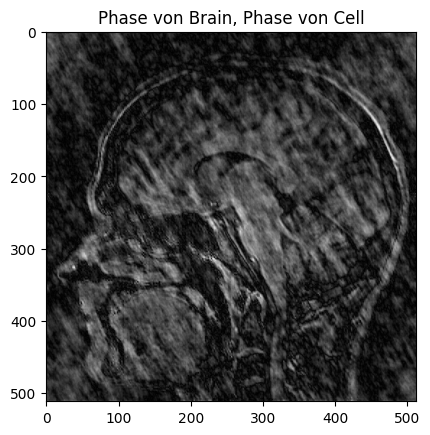

In [392]:
# Rückgängig machen des Shifts und Inverse-FFT
merged_ft_no_shift_brain_amplitude_cell_phase = np.fft.ifftshift(merged_ft_brain_amplitude_cell_phase)
restored_image_brain_amplitude_cell_phase = np.fft.ifft2(merged_ft_no_shift_brain_amplitude_cell_phase)

# Plot der wiederhergestellten Bilder
plt.imshow(np.abs(restored_image_brain_amplitude_cell_phase), cmap='gray')
plt.title("Amplitude von Brain, Phase von Cell")
plt.axis('off')
plt.show()

merged_ft_no_shift_brain_phase_cell_phase = np.fft.ifftshift(merged_ft_brain_phase_cell_phase)
restored_image_brain_phase_cell_phase = np.fft.ifft2(merged_ft_no_shift_brain_phase_cell_phase)

# Plot der wiederhergestellten Bilder
plt.imshow(np.abs(restored_image_brain_phase_cell_phase), cmap='gray')
plt.title("Phase von Brain, Phase von Cell")



---


**[Task 3 (a).]()** Create a lowpass filter mask.


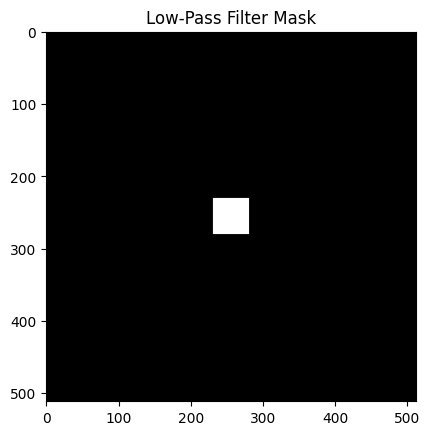

In [393]:
filter_size = 50

mask_lp = np.zeros_like(shifted_brain_amplitude)

# Definiere das Rechteck im Zentrum, das mit Einsen gefüllt wird
center_x, center_y = mask_lp.shape[0] // 2, mask_lp.shape[1] // 2
mask_lp[center_x - filter_size // 2:center_x + filter_size // 2,
        center_y - filter_size // 2:center_y + filter_size // 2] = 1

# Zeige die Low-Pass Filter-Maske an
plt.imshow(mask_lp, cmap='gray')
plt.title("Low-Pass Filter Mask")
plt.show()

**[Task 3 (b).]()** Create a highpass filter maks.


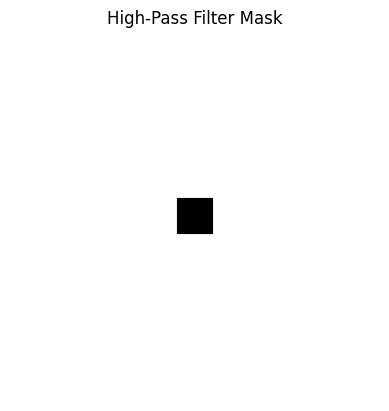

In [394]:
mask_hp = 1 - mask_lp

# Zeige die High-Pass Filter-Maske an
plt.imshow(mask_hp, cmap='gray')
plt.title("High-Pass Filter Mask")
plt.axis('off')
plt.show()

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


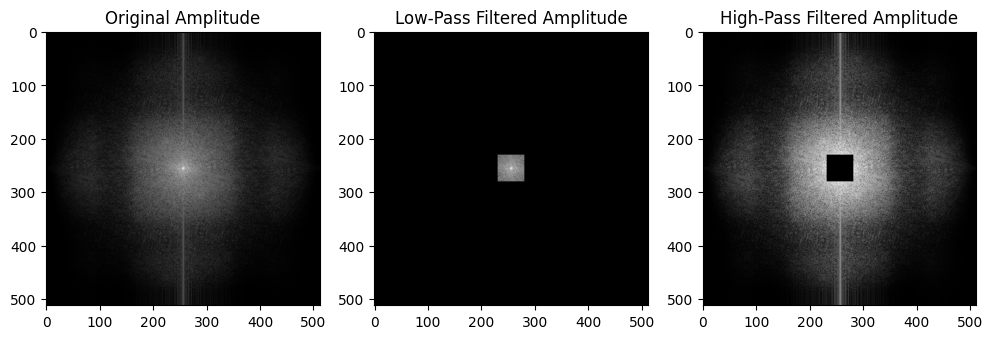

In [395]:
# Low-Pass gefilterte Amplitude
low_pass_amplitude = shifted_brain_amplitude * mask_lp

# High-Pass gefilterte Amplitude
high_pass_amplitude = shifted_brain_amplitude * mask_hp

# Anzeige der Amplituden (logarithmisch)
plt.figure(figsize=(12, 4))

# Original Amplitude (logarithmisch)
plt.subplot(1, 3, 1)
plt.imshow(np.log(shifted_brain_amplitude + 1), cmap='gray')
plt.title("Original Amplitude")


# Low-Pass gefilterte Amplitude (logarithmisch)
plt.subplot(1, 3, 2)
plt.imshow(np.log(low_pass_amplitude + 1), cmap='gray')
plt.title("Low-Pass Filtered Amplitude")


# High-Pass gefilterte Amplitude (logarithmisch)
plt.subplot(1, 3, 3)
plt.imshow(np.log(high_pass_amplitude + 1), cmap='gray')
plt.title("High-Pass Filtered Amplitude")


plt.show()

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


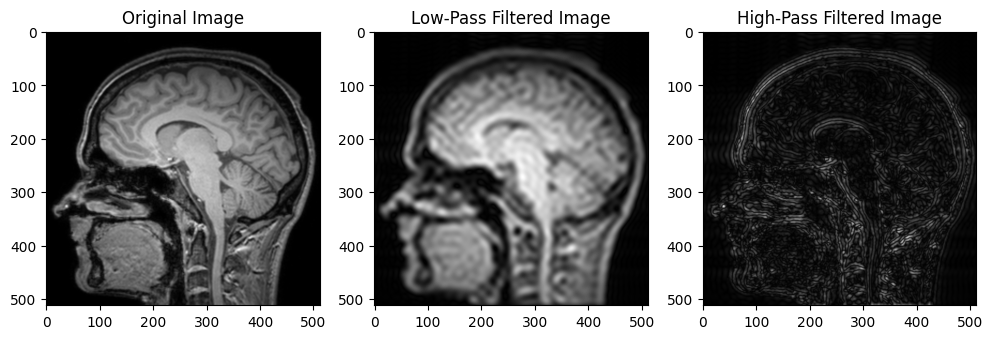

In [396]:
# Funktion zur Erstellung eines komplexen Arrays aus Amplitude und Phase
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

# Low-Pass gefiltertes Bild rekonstruieren
merged_ft_low_pass = to_complex_array(low_pass_amplitude, shifted_brain_phase)
merged_ft_no_shift_low_pass = np.fft.ifftshift(merged_ft_low_pass)
restored_image_low_pass = np.fft.ifft2(merged_ft_no_shift_low_pass)

# High-Pass gefiltertes Bild rekonstruieren
merged_ft_high_pass = to_complex_array(high_pass_amplitude, shifted_brain_phase)
merged_ft_no_shift_high_pass = np.fft.ifftshift(merged_ft_high_pass)
restored_image_high_pass = np.fft.ifft2(merged_ft_no_shift_high_pass)

# Originalbild rekonstruieren (falls benötigt)
merged_ft_original = to_complex_array(shifted_brain_amplitude, shifted_brain_phase)
merged_ft_no_shift_original = np.fft.ifftshift(merged_ft_original)
restored_image_original = np.fft.ifft2(merged_ft_no_shift_original)

# Anzeigen der rekonstruieren Bilder
plt.figure(figsize=(12, 4))

# Original Bild
plt.subplot(1, 3, 1)
plt.imshow(np.abs(restored_image_original), cmap='gray')
plt.title("Original Image")

# Low-Pass gefiltertes Bild
plt.subplot(1, 3, 2)
plt.imshow(np.abs(restored_image_low_pass), cmap='gray')
plt.title("Low-Pass Filtered Image")

# High-Pass gefiltertes Bild
plt.subplot(1, 3, 3)
plt.imshow(np.abs(restored_image_high_pass), cmap='gray')
plt.title("High-Pass Filtered Image")

plt.show()

---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


In [397]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

NameError: name 'brain_img' is not defined

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
